 ## Descenso de Gradiente

El método de descenso por gradiente, gradient descent de ahora en adelante, es uno de los algoritmos de optimización más populares en aprendizaje automático, ya que este es ampliamente ocupado en el campo de las redes neuronales

el metodo del descenso por gradiente se resume a grandes rasgos en el siguiente algoritmo:

1.- calcular el vector gradiente de la funcion f

$$\nabla f=\left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots ,\frac{\partial f}{\partial x_n} \right]$$

2.- $ w0 = w0 - k*\nabla f(w0)$ donde $k$ es un parametro de aprendizaje

Aunque avancemos en dirección contraria al gradiente esta estrategia no nos garantiza que lleguemos al punto más mínimo, y en algunas ocasiones nos conducirá a mínimos locales. Estos son regiones que parecen mínimos por la configuración alrededor a ellos, pero no son el mínimo global. Otra región de la función todavía podría estar en una zona más baja.

ejemplo:
calculemos el punto minimo para la funcion $f(x)=x^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def f(x):
    return x*x

In [3]:
def derf(x):
    return 2*x

In [4]:
x1 = np.linspace(-2, 10, num=100)

In [5]:
y1=np.zeros(100)
for i in range(100):
    y1[i]=f(x1[i])

In [6]:
def desgra(x,k,e):
    x0=x-k*derf(x)
    while abs(x-x0)>e:
        x=x0
        x0=x-k*derf(x)
    return x0

In [7]:
desgra(5,0.2,.003)

0.0039182082047999976

¿como es que se mueve los puntos en el espacio?

In [8]:
x=np.zeros(21)
k=0.2
x[0]=10
for i in range(1,21):
    x[i]=x[i-1]-k*derf(x[i-1])
y2=np.zeros(21)
for i in range(21):
    y2[i]=f(x[i])

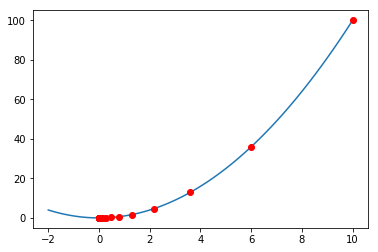

In [9]:
plt.plot(x1,y1)
plt.plot(x,y2,'bo',c='red')

ejemplo de la funcion $z=x^2+y^2$ sabemos que este tiene un minimo global en el punto $(0,0)$

In [10]:
def gradf(x,y):
    return np.array((2*x,2*y))

In [11]:
z=np.array((8,9))
z1=np.zeros((21,2))
i=0
k=.2
z1[0]=z
for i in range(1,21):
    z1[i]=z1[i-1]-k*gradf(z1[i-1,0],z1[i-1,1])


C:\Users\maick\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


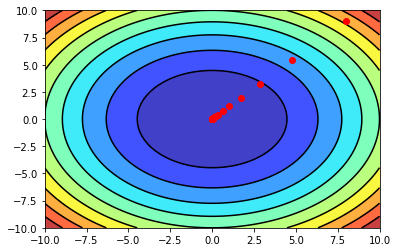

In [12]:
def f(x, y):
    return (x ** 2 + y ** 2) 

n = 256
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 10, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 10, colors='black', linewidth=.5)
plt.plot(z1[:,0],z1[:,1],'bo',c='red')

ejemplo para una funcion con minimos locales 

tomemos la funcion $F(x)=sin(x)+cos( \sqrt{3} x)$

In [13]:
def f1(x):
    return np.sin(x)+np.cos(np.sqrt(3)*x)

In [14]:
def derf1(x):
    return np.cos(x)-np.sin(np.sqrt(3)*x)*np.sqrt(3)

In [15]:
x1 = np.linspace(-2, 20, num=1000)

In [16]:
y11=np.zeros(1000)
for i in range(1000):
    y11[i]=f1(x1[i])

In [21]:
x=np.zeros(21)
k=2
x[0]=5
for i in range(1,21):
    x[i]=x[i-1]-k*derf1(x[i-1])
y2=np.zeros(21)
for i in range(21):
    y2[i]=f1(x[i])

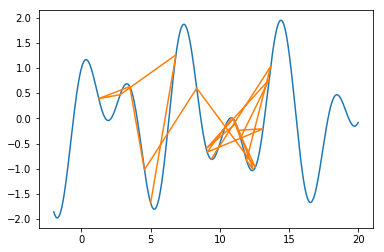

In [22]:
plt.plot(x1,y11)
plt.plot(x,y2)

en este caso es claro que el algoritmo solo es capas de converger a un minimo local sin importar el factor de aprendizaje que se de, con lo cual es claro que este algoritmo no es muy versatil bajo funciones que tengan varios minimos locales 